# Wire-spool sensor

Andrés Marrugo, PhD     
Universidad Tecnológica de Bolívar

A spool of magnet wire (copper wire insulated with a thin layer of polyurethane) contains 500 m of wire with a diameter of 0.2 mm. It is proposed to use the spool as a temperature sensor to sense the temperature in a freezer. The proposed range is between $45^{\circ}$C and $10^{\circ}$C. A milliammeter is used to display the temperature by connecting the sensor directly to a 1.5 V battery and measuring the current through it.

a. Calculate the resistance of the sensor and the corresponding currents at the minimum and maximum temperatures.    
b. Calculate the maximum power the sensor dissipates.

## Solution

First, let's draw the temperature sensor circuit composed of a 1.5 V battery, a milliammeter and variable resistor which is our temperature sensor.

![Temperature sensor circuit.](../images/circuit.png "Temperature sensor circuit.")
**Temperature sensor circuit.**

The electric resistance is given by the following equation

$$ R = \frac{L}{\sigma s} = \frac{L}{\sigma_0 S} (1+\alpha[T-T_0]) , $$

where for Copper at $T_0=20^{\circ}$, $\sigma_0=5.8\times 10^7$S/m, and $\alpha=0.0039$. 

Replacing in the equation we get two values for $R$, namely $R(-45^{\circ})$ and $R(+10^{\circ})$:

In [15]:
from math import *

L = 500
sigma0 = 5.8e7
alpha = 0.0039
d = 0.2e-3
T0 = 20

# The cross section area
S = pi/4*d**2

# Resistance @ -45
R_1 = L/(sigma0*S)*(1+alpha*(-45-T0))

# Resistance @ +10
R_2 = L/(sigma0*S)*(1+alpha*(+10-T0))

print('R(-45) = %2.2f Ohm' % (R_1))
print('R(+10) = %2.2f Ohm' % (R_2))

R(-45) = 204.84 Ohm
R(+10) = 263.70 Ohm


Now we compute the currents by $I=V/R$.

In [16]:
V = 1.5

# I @ -45
I_1 = V/R_1

# I @ +10
I_2 = V/R_2

print('I(-45) = %2.2f mA' % (I_1*1000)) # we multiply by 1000 to express in milliAmpere
print('I(+10) = %2.2f mA' % (I_2*1000))

I(-45) = 7.32 mA
I(+10) = 5.69 mA


We know the resistance is linear with the temperature. However, the current is not. We can check how large is the non-linearity.

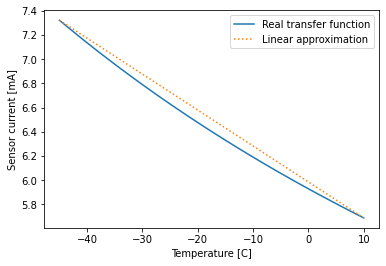

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

T = np.linspace(-45,10)

R = L/(sigma0*S)*(1+alpha*(T-T0))

I = 1.5/R

# We plot I vs T
plt.plot(T,I*1000);
plt.plot(np.array([-45, 10]), np.array([I_1, I_2])*1000,':');
plt.ylabel('Sensor current [mA]')
plt.xlabel('Temperature [C]')
plt.legend(['Real transfer function', 'Linear approximation'])
plt.show()

Although the current is not linear with temperature, it can be approximated as linear. We can compute the approximate sensitiviy of the sensor to get a sense of how the current changes with temperature. We can approximate the sensitivity as

$$ Sensitivity = \frac{I(+10^{\circ}C) - I(-45^{\circ}C)}{10^{\circ}C-(-45^{\circ}C)} $$

In [18]:
Sensitivity = (I_2-I_1)/(10-(-45))

print('The sensitivity is %2.2f uA/ºC' % (Sensitivity*1e6))

The sensitivity is -29.72 uA/ºC


Although it is relatively small, it is still measurable. Any digital ammeter should be able to measure at least a change in $10 \mu$A.

Next, we compute the power that the sensor dissipates for the range, as $P=I^2R$.

In [19]:
# P @ -45
P_1 = I_1**2*R_1

# P @ +10
P_2 = I_2**2*R_2

print('P(-45) = %2.2f mW' % (P_1*1000)) # we multiply by 1000 to express in milliWatt
print('P(+10) = %2.2f mW' % (P_2*1000))

P(-45) = 10.98 mW
P(+10) = 8.53 mW


The power is relatively low, which is a good thing. 

> This page was written in the [IPython Jupyter Notebook](https://jupyter.org/). To download the notebook click on this option at the top menu or get it from the [github repo](https://github.com/agmarrugo/sensors-actuators).